# Introduction to `julia` for statistic

- To contact me, here is my email : [joseph.gergaud@toulouse-inp.fr](joseph.gergaud@toulouse-inp.fr)

- The files ares here : 

[https://gitlab.irit.fr/toc/etu-n7/julia](https://gitlab.irit.fr/toc/etu-n7/julia)

directory M2

- Evaluation :  Homework (notebook)



## empirical cumulative distribution function, eCDF
### Exercise 1
1. Build the empirical cumulative distribution function

In [1]:
# use broadcasting
a = [1,2,3.5]
a .< 2

3-element BitVector:
 1
 0
 0

In [14]:
using Test   # for tests

"""
   Compute de number of element in the vactor t less than a value x
   input
   t : Vector of Real
   x : Real
   Output
   Integer
"""
function empirique(t::Vector{<:Real}, x::Real)::Int
    # to complete
    return sum(t .< x)  # .< vectorial operation
end


println("empirique([1.,2,3],1.5) = ", empirique([1.,2,3],1.5))

Test.@test empirique([1.,2,3],1.5) == 1

empirique([1.,2,3],1.5) = 1


Test Passed

In [3]:
# If the type of the vector elements is not a real then there is an error
println("empirique([1.+2im,2,3],1.5) = ", empirique([1.,2+2im,3],1.5))

MethodError: MethodError: no method matching empirique(::Vector{ComplexF64}, ::Float64)
The function `empirique` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  empirique(!Matched::Vector{<:Real}, ::Real)
   @ Main ~/Courses/julia/course-tse-julia/M2/resources/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W3sZmlsZQ==.jl:11


2. Generate a sample of N=1000 datas from a uniform distribution on [0,2] and plot the eCDF of this sample

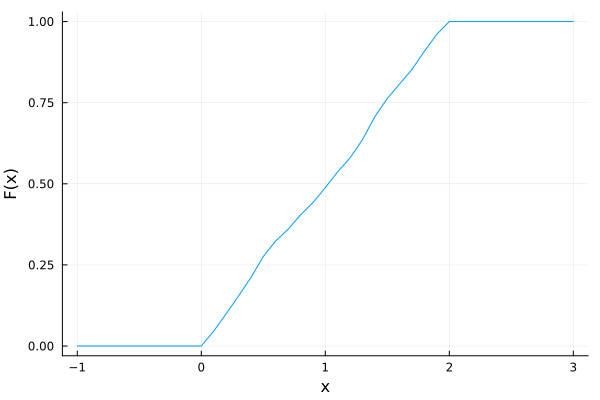

In [4]:
using Plots  # for plots
N = 1000 # number of datas
u = 2*rand(N)   # uniform law on [0,2]
x_grid = -1:0.1:3
# Plot of the empirical cumulative distribution function
using Plots
F(x) = empirique(u,x)/N
p_uniform_cdf = plot(x_grid,F,xlabel="x", ylabel="F(x)", legend=false)

3. Add on the plot the Cumulative Distribution Function
For thie use de Distributions Package

In [5]:
# add the cumulative distribution function
using Distributions


## Distributions Package

### Introduction

There is lots of libraries (Packages in `julia`) : [https://julialang.org/packages/](https://julialang.org/packages/)

For the documentation of the Distributions Package see 

[https://juliastats.org/Distributions.jl/stable/](https://juliastats.org/Distributions.jl/stable/)

In [15]:
using Distributions
using Plots
using LaTeXStrings
a = 0; b = 2;
dist = Uniform(a,b)  # dist is an object : the uniform distribution on [a,b]
println("type de dist = ",typeof(dist))
# you can acces to the mean or median of the distribution
println("mean(dist) = ", mean(dist))
println("median(dist) = ", median(dist))
# and the the PDF, CDF and inverse CDF function of the distribution
println("pdf(1.2) = ", pdf(dist,1.2))
println("pdf(3) = ", pdf(dist,3))
println("cdf(1.2) = ", cdf(dist,1.2))
println("cdf(3) = ", cdf(dist,3))
println("inverse of cdf(0.75) = ", quantile(dist,0.75))


type de dist = Uniform{Float64}
mean(dist) = 1.0
median(dist) = 1.0
pdf(1.2) = 0.5
pdf(3) = 0.0
cdf(1.2) = 0.6
cdf(3) = 1.0
inverse of cdf(0.75) = 1.5


#### Exercise 2

Plot on the same first graph the CFD of the uniform distribution on [0,2]


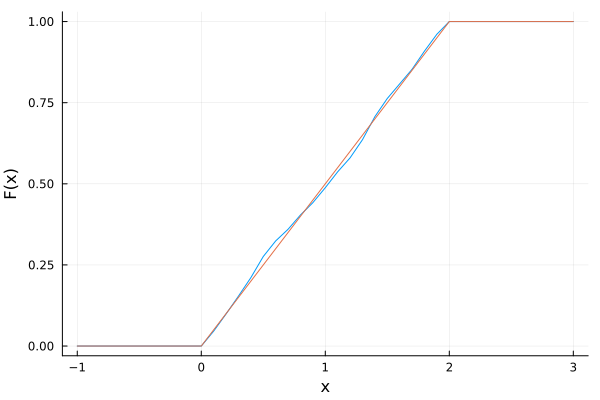

In [16]:
cdf_uniform(x) = cdf(dist,x)
plot!(p_uniform_cdf,x_grid,cdf_uniform,xlabel="x", ylabel="F(x)", legend=false)

### Triangular Distribution
We consider the distribution with the following density distribution
$$f(x) = \begin{cases}
x\quad\textrm{pour}\quad x\in[0,1]\\
2-x\quad\textrm{pour}\quad x\in[1,2]\\
0\quad\textrm{sinon}
\end{cases}$$

Plot the density, cumulative dendity and inverse cumulative function

type de dist = TriangularDist{Float64}
params(dist) = (0.0, 2.0, 1.0)


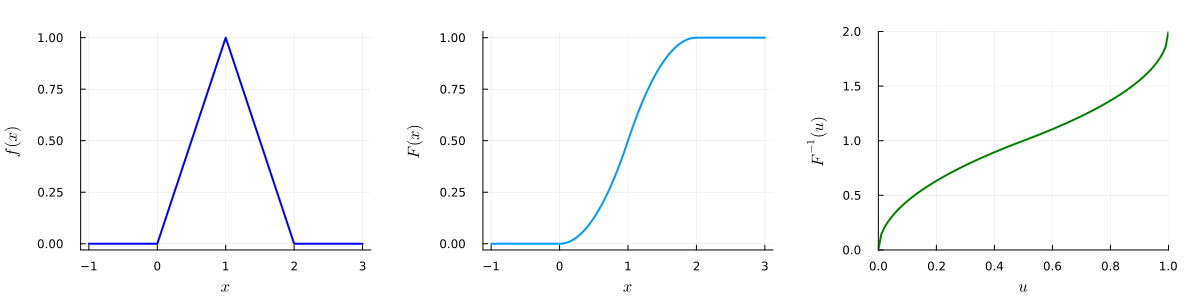

In [17]:
using Distributions
using Plots
using LaTeXStrings
a = 0; b = 2;
dist = TriangularDist(a,b,1)  # min = a; max = b; mode = 1
println("type de dist = ",typeof(dist))
println("params(dist) = ", params(dist))


# Density function
p1 = plot(x_grid, x->pdf(dist,x), color = :blue, linewidth=2, xlabel=(L"x"), ylabel=(L"f(x)")) 
# Cumulative density function
p2 = plot(a-1:0.01:b+1, x->cdf(dist,x), linewidth=2, xlabel=(L"x"), ylabel=(L"F(x)"))  
# Inverse cumulative density function
p3 = plot(0:0.01:1, x->quantile(dist,x), xlims=(0,1), ylims=(0,2), color = :green, linewidth=2, xlabel=(L"u"), ylabel=(L"F^{-1}(u)"))
plot(p1,p2,p3, layout=(1,3),legend = false,size = (1200,300), margin = 0.6Plots.cm)

#### Histogram
Generate a sample of 100 datas from the triangular distribution and plot on the same graph the histogram of the simple and the PDF function

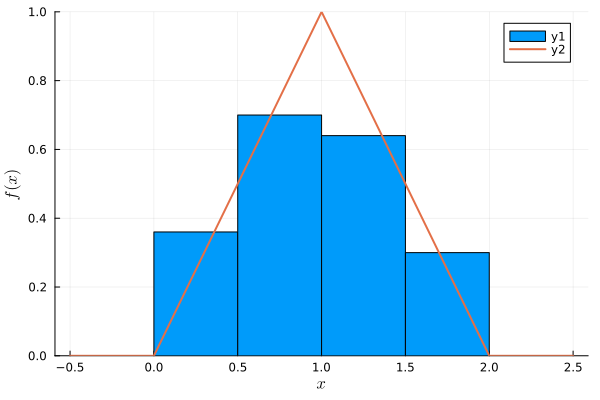

In [18]:
# Sample of 100 datas
t = rand(dist,100)
histogram(t) 
histogram(t,normalize=true) # normalize=true pour ajouter la fonction de densité
plot!(a-0.5:0.1:b+0.5, x->pdf.(dist,x), linewidth=2, xlabel=(L"x"), ylabel=(L"f(x)"))   

#### Question
What is the problem ?

1. Use the normalize=true parameter in the histogram function for solving the problem
2. Execute for a sample of N = 10000 datas

### Example of discret distribution : the binomial distribution


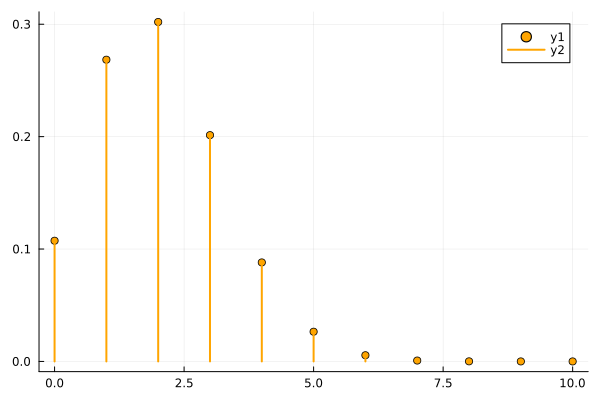

In [19]:
n, p, N = 10, 0.2, 10^3
bDist = Binomial(n,p)
xgrid = 0:n
plot(xgrid,pdf.(bDist,xgrid), color=:orange, seriestype = :scatter)
plot!(xgrid,pdf.(bDist,xgrid), line = :stem, linewidth=2, color=:orange)

#### 

## Central limit theorem

We are going to illustrate the central limit theorem : 

Suppose $X_1,X_2,\ldots$ is a sequence of Independent and identically distributed random variables with $E(X_i)=\mu$ and $Var(X_i)=\sigma^2 < +\infty$. Then, as $n$ approaches infinity, the random variables $\sqrt{n}(\bar{X}_n - \mu)$ converge in distribution to a normal distribution $\mathcal{N}(0,\sigma^2)$


### Exercise
1. Choose a distribution law dist, compute its mean $\mu$ and its variance $\sigma^2$ and $N$ the number of sanple
2. For $n$ in (1,2,5,20)
    1. Generate N=10000 samples of lenght n from the dist distribution
    2. Compute the means of the $N$ samples and the $N$ values $\sqrt{n}(\bar{X}_n - \mu)$
    3. Plot the histogram of these $N$ values and the normal distribution $\mathcal{N}(0,\sigma^2)$



In [20]:
X = rand(dist,(2,3))
println(X)
(mean(X,dims=1))


[1.6238502970841644 1.6152917617470268 0.6276948740727439; 1.9019416578611044 0.9174508739539737 1.258732748878705]


1×3 Matrix{Float64}:
 1.7629  1.26637  0.943214

$\mu = $6.0
$\sigma = $3.4641016151377544
Any[Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}]


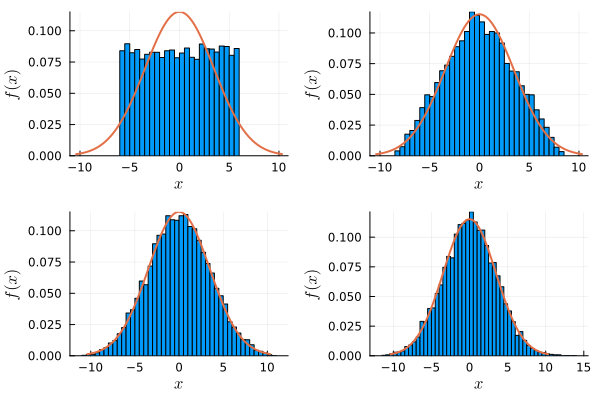

In [21]:
dist = Uniform(0,12)
μ = mean(dist)
σ = std(dist)
normal_dist = Normal(0,σ)
println(L"\mu = ", μ)
println(L"\sigma = ", σ)
N = 10000
n_mean = (1,2,5,20)

p = []
for n in n_mean 
    X = rand(dist,(n,N))
    Xbar_n = vec(sqrt(n)*(mean(X,dims=1) .- μ)) # to have a vector and not a matrix of size (1,3)
    
    p1 = histogram(Xbar_n,normalize=true) # normalize=true pour ajouter la fonction de densité
    plot!(p1, -3*σ:0.1:3*σ, x->pdf.(normal_dist,x), linewidth=2, xlabel=(L"x"), ylabel=(L"f(x)"))   
    push!(p,p1)
end
println(p)
plot(p[1],p[2],p[3],p[4],legend = false)